# Simple Linear Regression | مثال على الانحدار الخطي البسيط

##### حاول تفهم اساسيات الانحدار الخطي قبل الاطلاع على الكود

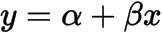

In [1]:
from IPython.display import SVG
SVG(url='https://www.gstatic.com/education/formulas2/472522532/en/simple_linear_regression.svg')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
data = pd.read_csv("Salary_Data.csv")
data.head(2)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


### رسم العلاقة باستخدام رسم النقاط

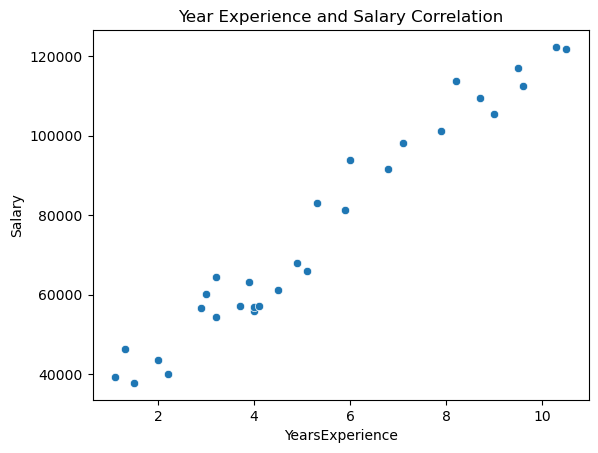

In [5]:
sns.scatterplot(x=data["YearsExperience"], y=data["Salary"]);
plt.title("Year Experience and Salary Correlation")
plt.show()

### العلاقة بين المتغيرات

In [6]:
np.corrcoef(data["YearsExperience"], data["Salary"])

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

### تقسيم البيانات الى تدريب و اختبار

In [7]:
features = ["YearsExperience"]
target = "Salary"

X = data[features]
y = data[target]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, shuffle=True, random_state=42)

In [9]:
X_train.head() # --> Matrix (DataFrame)

,YearsExperience
28,10.3
24,8.7
12,4.0
0,1.1
4,2.2


In [10]:
y_train.head() # --> Vector (Series)

28    122391.0
24    109431.0
12     56957.0
0      39343.0
4      39891.0
Name: Salary, dtype: float64

### تدريب المودل على بيانات التدريب

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### R2 Score

In [12]:
model.score(X_train, y_train)

0.9645401573418146

### Line of Best Fit

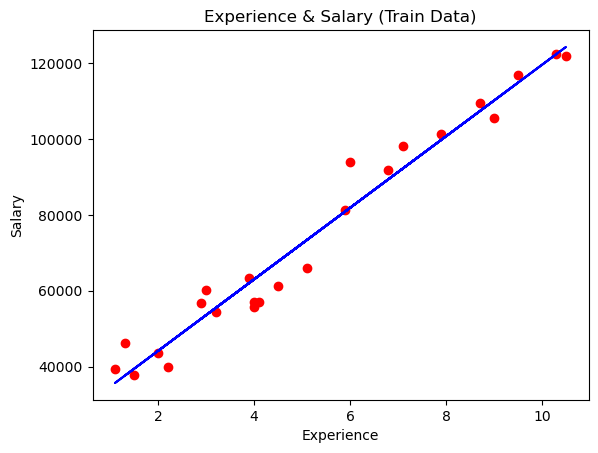

In [13]:
plt.scatter(X_train, y_train, color="red")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Experience & Salary (Train Data)")
plt.plot(X_train, model.predict(X_train), color="blue")
plt.show()

### التوقع باستخدام بيانات الاختبار

In [14]:
y_pred = model.predict(X_test)
y_pred[:10]

array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])

In [15]:
r2_score(y_test, y_pred)

0.9024461774180497

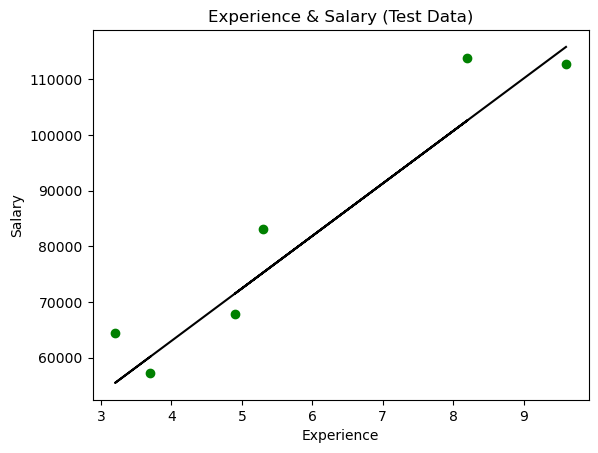

In [16]:
plt.scatter(X_test, y_test, color="green")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Experience & Salary (Test Data)")
plt.plot(X_test, y_pred, color="black")
plt.show()

### رسم الاختلاف

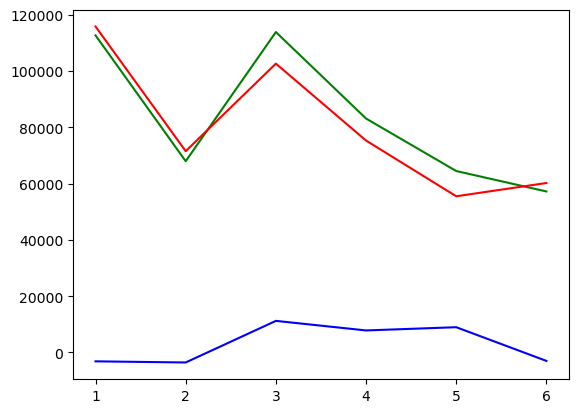

In [17]:
xline = [i for i in range(1, len(y_test)+1)]
plt.plot(xline, y_test, color="green")
plt.plot(xline, y_pred, color="red")
plt.plot(xline, (y_test - y_pred), color="blue") # --> Error
plt.show()

### mean_squared_error

In [18]:
mean_squared_error(y_test, y_pred).round(2)

49830096.86

### mean_absolute_error

In [19]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred).round(2)

6286.45

### Intercept & Coefficient

In [20]:
print(f"Intercept: {model.intercept_}\nCoefficient : {model.coef_[0]}")

Intercept: 25321.583011776813
Coefficient : 9423.815323030976
